# **TRABAJO PRÁCTICO FINAL**

| Integrantes | Legajo|
| ----- | --- |
|Aguilera, Nicolas | X-9999/9 |
|Zanin, Santino | X-9999/9 |

# Archivos

## Descarga

In [44]:
!gdown 1WWvf6yn5oS1xarapKnwr3s8l2wKWtd7d # releer colab csv para la comisión 1 y 3
!gdown 12Hq0X1H3pS82pYDHY11hn132lWfl8CJn

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


# Modulos y lectura

In [45]:
import matplotlib.pyplot as plt
import csv

# Enunciado 1
- Leer el archivo **'coordenadas_provincias.csv'** que se encuentra en esta dirección: \
  `
  https://drive.google.com/file/d/1WWvf6yn5oS1xarapKnwr3s8l2wKWtd7d/view?usp=drive_link
  `
- Crear la función listToDict que se encarga de convertir los datos leídos a una lista de diccionarios.
- Llamar a la función anterior con los datos del archivo leído y verificar que devuelva lo pedido.
- Crear el constructor de la clase **'Provincia'**
- Crear un objeto de la clase **'Provincia'**


In [46]:
def openFile(*args) -> list:
    """
    Recibe un archivo de tipo csv y devuelve dos listas, una con cada dato de las provincias y otra con los encabezados.
    """
    with open(*args, "r") as contenido:
        lector = csv.reader(contenido)
        lista_retorno = []
        encabezado = next(lector)
        for fila in lector:
            for elemento in fila:
                lista_retorno.append(elemento)

    return lista_retorno, encabezado

In [47]:
def listToDict(lista_retorno: list, encabezado: list) -> list:
    """
    Recibe una lista con nombres y coordenadas de provincias y crea
    un diccionario por cada uno, con el nombre de la provincia como clave y las
    coordenadas como valores.
    Devuelve una lista con estos diccionarios.
    """
    lista_provincias_coordenadas = []

    for celda in range(0, len(lista_retorno), 3):
        provincia_coordenadas = {}
        clave = lista_retorno[celda]
        valores = (lista_retorno[celda+1], listalista_retorno[celda+2])
        provincia_coordenadas[clave] = valores
        lista_provincias_coordenadas.append(provincia_coordenadas)

    return lista_provincias_coordenadas

## Clase Provincia

In [48]:
class Provincia:
  """
  Esta clase representa una provincia.
  Atributos:apertura nombre: str coordenada: tuple
  """

  def __init__(self, nombre: str, coordenada: tuple):
    self.nombre = nombre
    self.coordenada = coordenada

  def __str__(self):
    return f"{self.nombre} es una provincia ubicada en {self.coordenada}"

In [49]:
def instanciaProvincia(lista_provincias_coordenadas: list) -> list:
    """
    La función instanciaProvincia recibe una lista de diccionarios y retorna una lista de objetos tipo provincia.
    Parte con una lista vacía y luego realiza dos bucles anidados. En primer lugar, itera todos los elementos
    (diccionarios) de la lista de output, y en segundo lugar, itera sobre el par clave-valor de cada diccionario invocando
    a la clase Provincia asignando como atributos a cada par clave (nombre), valor(coordenada en forma de tupla). Luego
    añade cada objeto a la lista de instancias.
    """
    instancia_de_provincias = []

    for provincia_index in lista_provincias_coordenadas:
        for nombre, coordenada in provincia_index.items():
            instancia = Provincia(nombre, coordenada)
            instancia_de_provincias.append(instancia)

    return instancia_de_provincias

## Clase

In [50]:
class Viaje:
    """
    Esta clase representa un viaje,
    contiene los datos relevantes al análisis.
    """
    def __init__(self, mes_inicio, provincia_origen, provincia_destino, viajes, viajeros, edicion):
        self.mes_inicio = mes_inicio
        self.provincia_origen = provincia_origen
        self.provincia_destino = provincia_destino
        self.viajes = viajes
        self.viajeros = viajeros
        self.edicion = edicion

    def __str__(self):
        return f"El presente objeto representa al mes {self.mes_inicio} como fecha de inicio, con origen" \
               f" {self.provincia_origen}, destino {self.provincia_destino}, con una cantidad {self.viajes} de viajes" \
               f", con una cantidad {self.viajeros} durante la edición {self.edicion}."

In [51]:
def instanciaViaje(lista_retorno: list) -> list:
    """
    La función instanciaViaje crea instancias a partir del output lista_retorno creado por la función openFile. Primero
    inicializa una variable fija de contador de cantidad de atributos totales de la clase Viaje. Luego se crea una lista
    de listas, que en su interior contiene las instancias individuales de cada Viaje. Se itera un bucle que toma los
    elementos de la lista y al igualar el número de atributos de la instancia, los atribuye a una instancia individual
    del objeto. Este objeto se añade a la lista de listas y se reinicia la lista de objetos individuales inicializándose
    vacía. Por último, retorna una lista que contiene todas las instancias de Viaje.
    """
    nro_de_atributos_instancia = 6
    instancia_de_viajes = []
    instancia = []

    for elemento in lista_retorno:
        instancia.append(elemento)
        if len(instancia) == nro_de_atributos_instancia:
            viaje = Viaje(instancia[0], instancia[1], instancia[2], int(instancia[3]), int(instancia[4]), instancia[5])
            instancia_de_viajes.append(viaje)
            instancia = []
    print("Se crearon ", len(instancia_de_viajes), "instancias de Viaje")
    return instancia_de_viajes

## Funciones

### Datos Relevantes

In [52]:
def pedidoParametros():
    """
    Esta función auxiliar recibe parámetros del usuario para usarlos luego en datos_relevantes.
    """
    lista_parametros = []
    opcion = input("Ingrese los parametros deseados (* para salir):")
    while opcion != "*":
        lista_parametros.append(opcion)
        opcion = input("Ingrese los parametros deseados (* para salir):")

    return lista_parametros


In [53]:
def datos_relevantes(instancia_de_viajes: list, lista_parametros: list) -> list:
    """
    La función datos_relevantes permite al usuario obtener información del archivo csv removiendo de su output las listas no deseadas.
    En primer lugar, crea una lista de listas. A continuación, crea una lista vacía en donde se guardan todos los elementos de una columna.
    Un primer bucle revisa que por cada elemento ingresado por el usuario en lista_parámetros se cree una lista vacía. Luego, en caso de
    encontrar coincidencia, obtiene los valores de los atributos del mismo nombre y lo agrega a una lista. La función retorna una lista
    de listas donde cada una de ellas contiene los valores originalmente presentes en cada columna del csv.
    """

    lista = []
    listaAtributos = []

    for elemAtributo in lista_parametros:                           # Recorre los atributos ingresados
        listaAtributos = []
        for instancia in instancia_de_viajes:                       # Recorre los objetos
            atributo = getattr(instancia, elemAtributo, None)       # Guardo el atributo pedido del objeto
            listaAtributos.append(atributo)                         # Guarda el atributo de ese tipo
        lista.append(listaAtributos)                                # Guardo la lista de atributos de ese tipo

    return lista

### Mas Viajeros

In [54]:
def mas_viajeros(instancia_de_viajes: list) -> str:
    """
    Esta función recibe una lista con todos los objetos de tipo Viaje, solicita al usuario un mes a chequear
    y devuelve la provincia que más viajeros recibió y cuantos ha recibido.
    """
    ingreso = input("Ingrese el año y el mes que desea chequear (ejemplo 2022-01): ")
    objetos_mes = []
    for instancia in instancia_de_viajes:
        if instancia.mes_inicio == ingreso:
            objetos_mes.append(instancia)
    print(objetos_mes)
    valor_mas_alto = 0
    for viaje in objetos_mes:
        if viaje.viajeros > valor_mas_alto:
            valor_mas_alto = viaje.viajeros
            provincia_mas_viajeros = viaje.provincia_destino

    print("La provincia que más viajeros recibió en",ingreso, "fue:",
          provincia_mas_viajeros,"con un total de", valor_mas_alto,"viajeros.")

    return viaje.provincia_destino, viaje.viajeros

### Calcular promedios

In [55]:
def calcular_promedio(entrada: list) -> float:
    """
    Esta función calcula promedios. Su input puede ser cualquier lista que
    contenga elementos de tipo int o float. En el contexto de esta función,
    puede recibir como entrada el output viajeros o viajes de la función datos_relevantes.
    """
    promedio = sum(entrada) / len(entrada)
    print("El promedio resultante es de:", promedio,".")
    return promedio

#Enunciado 3
- Usar los datos del archivo 'previaje.csv' para cargar una estructura de datos
que consideren adecuada los datos que consideren pertinentes para
responder la siguiente pregunta: ¿cuántos viajes fueron realizados en cada
edición del programa PreViaje?
- Realizar un gráfico de torta que muestre los porcentajes de viajes
correspondientes a cada edición, sobre el total de viajes del programa
completo. Para ello deberán usar los módulos matplotlib y seaborn. Use los
ejemplos publicados como guía.

In [56]:
def viajes_edicion(instancia_de_viajes: list) -> list:
    """
    Recibe una lista con objetos de tipo viaje y devuelve tres listas con los viajes de cada edición.
    """
    viajes_previaje1 = []
    viajes_previaje2 = []
    viajes_previaje3 = []
    for instancia in instancia_de_viajes:
        match instancia.edicion:
            case "previaje 1":
                viajes_previaje1.append(instancia.viajes)
            case "previaje 2":
                viajes_previaje2.append(instancia.viajes)
            case "previaje 3":
                viajes_previaje3.append(instancia.viajes)

    print("En la edición 1 de PreViaje fueron realizados", sum(viajes_previaje1),
          "viajes. En la edición 2 de Previaje fueron realizados", sum(viajes_previaje2),
          "y en la edición 3 de Previaje fueron realizados", sum(viajes_previaje3), "viajes. En total se realizaron",
          sum(viajes_previaje1 + viajes_previaje2 + viajes_previaje3), "viajes.")

    return viajes_previaje1, viajes_previaje2, viajes_previaje3

In [57]:
def funAux(viajes_previaje1, viajes_previaje2, viajes_previaje3):
    """
    Esta función recibe los viajes de cada edición y devuelve una lista con la cantidad de viajes
    en cada edición y una lista con el nombre de cada edición. Es una función auxiliar que procesa datos antes
    de que la función DiagramaSectorial los grafique.
    """
    listaCantViajes = [sum(viajes_previaje1), sum(viajes_previaje2), sum(viajes_previaje3)]
    ediciones = ["Edición 1", "Edición 2", "Edición 3"]

    return listaCantViajes, ediciones

In [58]:
def DiagramaSectorial(titulo: str, etiquetas, porcentajes):
    """
    Esta funcion crea el diagrama con el porcentaje que representa la cantidad de viajes de cada edición con respecto al total de viajes.
    """
    explode = (0, 0.1, 0)

    plt.figure(figsize=(15, 6))
    plt.title(titulo, fontsize=25)
    plt.pie(porcentajes, labels=etiquetas, autopct="%0.1f %%", shadow = True, explode = explode)

# A partir de una provincia de destino, crear una estructura de datos que contenga la cantidad de viajeros desde la provincia de origen

In [63]:
def viajerosPorProvincia (instancia_de_viajes: list, destino: str, edicion: str) -> dict:
    cantidad_origen = {}
    for instancia in instancia_de_viajes:
        if edicion == instancia.edicion and destino == instancia.provincia_destino:
            if instancia.provincia_origen in cantidad_origen:
                cantidad_origen[instancia.provincia_origen] += instancia.viajeros
            else:
                cantidad_origen[instancia.provincia_origen] = instancia.viajeros
    
    return cantidad_origen
    

In [60]:
def GraficoBarras(instancia_de_viajes: list) -> list:
    """

    :param instancia_de_viajes:
    :return:
    """
    ingreso = input("Ingrese la edición a chequear: (ejemplo 'previaje 1')")
    lista_provisoria = []
    lista_viajeros = []
    lista_provincias = []
    for instancia in instancia_de_viajes:
        if ingreso == instancia.edicion:
            lista_provisoria.append(instancia)

   #  for instancia in lista_provisoria:
   #     nombre = []
   #      nombre.append(instancia.provincia_destino)
   #      print(nombre)
   #     if instancia.provincia_destino == nombre:
   #         lista_suma.append(instancia.viajeros)
   #     lista_suma = sum(lista_suma)
   #     lista_viajeros.append(lista_suma)

    #valores_viajeros = []
    #viajeros_total_provincia = []
    #for instancia in lista_provisoria:
    #    destino = instancia.provincia_destino
    #    valores_viajeros.append(instancia.viajeros)
    #    if instancia.provincia_destino != destino:
    #        sum(valores_viajeros)
    #        viajeros_total_provincia.append(valores_viajeros)
    #        valores_viajeros = []


    #print(destino)
    #print(lista_viajeros)
    #print(lista_provincias)

    #plt.figure(figsize=(15, 6))
    #plt.title("", fontsize=25)
    #plt.bar(lista_provincias, lista_viajeros)

    #return lista_viajeros




# Programa principal

Se crearon  11033 instancias de Viaje


Ingrese los parametros deseados (* para salir): *


[]
En la edición 1 de PreViaje fueron realizados 169454 viajes. En la edición 2 de Previaje fueron realizados 1549951 y en la edición 3 de Previaje fueron realizados 369655 viajes. En total se realizaron 2089060 viajes.


Ingrese la edición a chequear: (ejemplo 'previaje 1') previaje 1


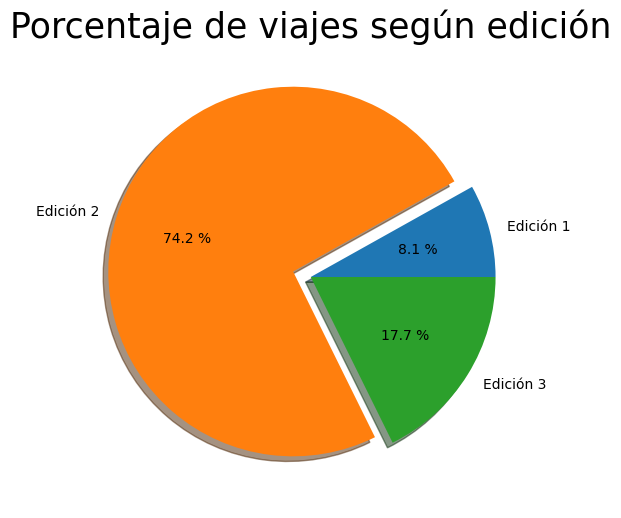

In [61]:
previaje, encabezado = openFile("previaje.csv")

listaObjViajes = instanciaViaje(previaje)
listaPedidos = pedidoParametros()
datosR = datos_relevantes(listaObjViajes, listaPedidos)
print(datosR)

edic1, edic2, edic3 = viajes_edicion(listaObjViajes)
listaCantViajes, ediciones = funAux(edic1, edic2, edic3)
DiagramaSectorial("Porcentaje de viajes según edición", ediciones, listaCantViajes)
GraficoBarras(listaObjViajes)
plt.show()


In [64]:
a = viajerosPorProvincia(listaObjViajes, "Buenos Aires", "previaje 1")
print(a)

{'Buenos Aires': 47839, 'Catamarca': 44, 'Chaco': 146, 'Chubut': 294, 'Ciudad AutÃ³noma de Buenos Aires': 29889, 'Corrientes': 79, 'CÃ³rdoba': 3712, 'Entre RÃ\xados': 1653, 'Formosa': 4, 'Jujuy': 257, 'La Pampa': 124, 'La Rioja': 175, 'Mendoza': 2584, 'Misiones': 222, 'NeuquÃ©n': 517, 'RÃ\xado Negro': 1363, 'Salta': 982, 'San Juan': 317, 'San Luis': 169, 'Santa Cruz': 201, 'Santa Fe': 8846, 'Santiago del Estero': 103, 'Tierra del Fuego, AntÃ¡rtida e Islas del AtlÃ¡ntico Sur': 604, 'TucumÃ¡n': 1427}


<function matplotlib.pyplot.show(close=None, block=None)>

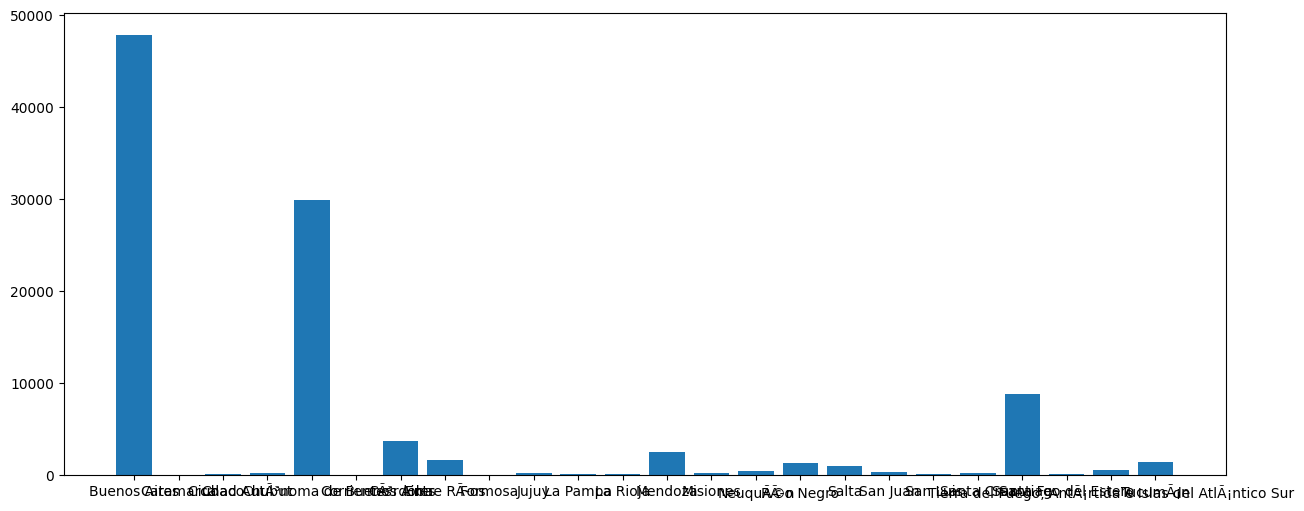

In [65]:
plt.figure(figsize=(15, 6))
plt.title("", fontsize=25)
plt.bar(a.keys(), a.values())
plt.show